In [98]:
import keras 
import numpy as np
from keras.layers.core import Dense, Dropout, Flatten
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras import layers
from keras.layers import Embedding
from keras.utils import np_utils
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D, AveragePooling1D
from keras import models
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [148]:
#Dataset of 11,228 newswires from Reuters, labeled over 46 topics. 
#As with the IMDB dataset, each wire is encoded as a sequence of word indexes (same conventions).

from keras import preprocessing
from keras.datasets import reuters
#training set has 8982 samples, test set has 2246

# Number of words to consider as features
max_features = 500
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 100


#We'll start by considering only 
(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=max_features,
                                                         skip_top=0,
                                                         maxlen=maxlen,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
y_train = np_utils.to_categorical(y_train, 46)
y_test = np_utils.to_categorical(y_test, 46)
#This dataset also makes available the word index used for encoding the sequences:
#Note there are 30979 words (we'll use this for our embedding)
word_index = reuters.get_word_index(path="reuters_word_index.json")




In [151]:
#We'll start by building a simple model using embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
# convolution layers
model.add(Flatten())
model.add(Dense(46, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_55 (Embedding)     (None, 100, 8)            80000     
_________________________________________________________________
flatten_52 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 46)                36846     
Total params: 116,846
Trainable params: 116,846
Non-trainable params: 0
_________________________________________________________________
Train on 4777 samples, validate on 1195 samples
Epoch 1/10
4777/4777 [==============================] - 2s 466us/step - loss: 0.1581 - acc: 0.9762 - val_loss: 0.0525 - val_acc: 0.9846
Epoch 2/10
4777/4777 [==============================] - 1s 145us/step - loss: 0.0474 - acc: 0.9861 - val_loss: 0.0439 - val_acc: 0.9874
Epoch 3/10
4777/4777 [==============================] - 1s 137us/step - loss: 0.

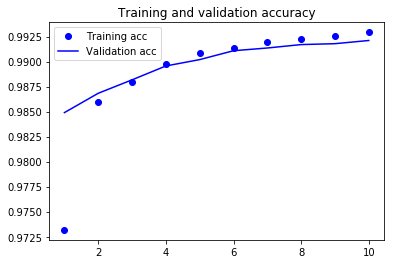

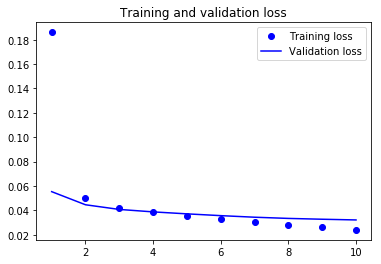

1195/1195 [==============================] - 0s 49us/step
Loss: 0.033
Accuracy: 0.992


In [130]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
scores = model.evaluate(x_test, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [154]:
#We'll start by building a simple model using embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.
# convolution layers
model.add(Flatten())

model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Activation('relu'))

model.add(Dense(46, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_57 (Embedding)     (None, 100, 8)            80000     
_________________________________________________________________
flatten_54 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 512)               410112    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
activation_43 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_84 (Dense)             (None, 46)                23598     
Total params: 513,710
Trainable params: 513,710
Non-trainable params: 0
_________________________________________________________________
Trai

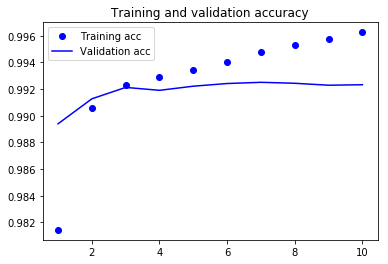

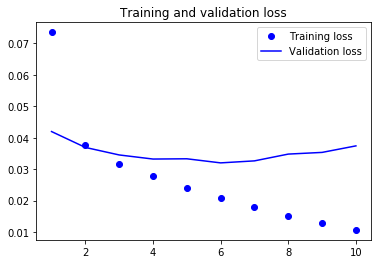

1195/1195 [==============================] - 0s 116us/step
Loss: 0.037
Accuracy: 0.992


In [155]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
scores = model.evaluate(x_test, y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])

In [164]:
(X_trainX_train, y_train), (X_test, y_test) = reuters.load_data(nb_words=500, maxlen=100, test_split=0.2)
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=100)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=100)
Y_train = np_utils.to_categorical(y_train, 46)
Y_test = np_utils.to_categorical(y_test, 46)

/Users/stuartgeman/anaconda/lib/python3.6/site-packages/keras/datasets/reuters.py:47: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


In [166]:
model = Sequential()

# embedding
model.add(Embedding(500, 32, input_length=100))
model.add(Dropout(0.25))

# convolution layers
model.add(Convolution1D(nb_filter=32,
                        filter_length=4,
                        border_mode='valid',
                        activation='relu'))
model.add(MaxPooling1D(pool_length=2))

# dense layers
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.25))
model.add(Activation('relu'))

# output layer
model.add(Dense(46))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1,
          validation_data=(X_test, Y_test))

/Users/stuartgeman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=4, padding="valid")`
/Users/stuartgeman/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:12: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
/Users/stuartgeman/anaconda/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 4777 samples, validate on 1195 samples
Epoch 1/15
4777/4777 [==============================] - 5s 1ms/step - loss: 0.0652 - acc: 0.9813 - val_loss: 0.0417 - val_acc: 0.9887
Epoch 2/15
4777/4777 [==============================] - 3s 644us/step - loss: 0.0371 - acc: 0.9912 - val_loss: 0.0355 - val_acc: 0.9922
Epoch 3/15
4777/4777 [==============================] - 3s 646us/step - loss: 0.0328 - acc: 0.9922 - val_loss: 0.0333 - val_acc: 0.9921
Epoch 4/15
4777/4777 [==============================] - 3s 652us/step - loss: 0.0303 - acc: 0.9927 - val_loss: 0.0323 - val_acc: 0.9925
Epoch 5/15
4777/4777 [==============================] - 3s 644us/step - loss: 0.0279 - acc: 0.9930 - val_loss: 0.0310 - val_acc: 0.9927
Epoch 6/15
4777/4777 [==============================] - 3s 689us/step - loss: 0.0260 - acc: 0.9934 - val_loss: 0.0305 - val_acc: 0.9928
Epoch 7/15
4777/4777 [==============================] - 3s 668us/step - loss: 0.0244 - acc: 0.9936 - val_loss: 0.0305 - val_acc: 0.9928
Ep

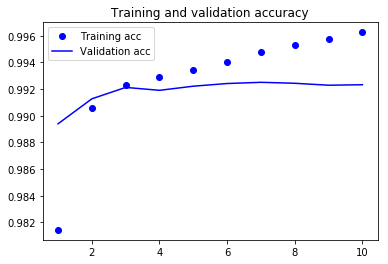

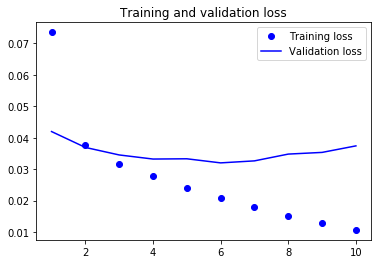

1195/1195 [==============================] - 0s 144us/step
Loss: 0.033
Accuracy: 0.993


In [167]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
scores = model.evaluate(X_test, Y_test)
print('Loss: %.3f' % scores[0])
print('Accuracy: %.3f' % scores[1])